
dataset source
https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-wildland-fire-locations-full-history/about

In [151]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [86]:
df = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv')

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,31,60,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(182790, 92)

In [536]:
df.dtypes

X                                           float64
Y                                           float64
OBJECTID                                      int64
ABCDMisc                                     object
ADSPermissionState                           object
                                       ...         
StrategicDecisionPublishDate    datetime64[ns, UTC]
CreatedOnDateTime_dt            datetime64[ns, UTC]
ModifiedOnDateTime_dt           datetime64[ns, UTC]
Source                                       object
GlobalID                                     object
Length: 92, dtype: object

In [9]:
df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:25+00,50.6,20.0,MTMCC,NaN,NaN,2020/08/12 20:46:00+00,NaN,NaN,NaN,NaN,Human,Equipment,Farming Equipment,NDU0,NaN,2020/08/06 18:58:00+00,NaN,2020/08/12 14:00:00+00,NaN,NaN,NaN,NaN,PN,1502,NRCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,Ramme,NaN,WF,FI,45.78496,-104.4958,NaN,1970/01/01 00:00:00+00,fe67856c-7401-44bd-b6f3-9a57ef990079,NaN,0,1.0,0.0,0.0,0.0,NaN,000224,NaN,NaN,NaN,Carter,MTMCC,30011,C&L,MTLG42,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,NR16,C&L,MTLG42,US-MT,Grass,GR4,NaN,NaN,NaN,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,1970/01/01 00:00:00+00,2020/08/06 19:50:29.023+00,2020/08/12 20:46:01.557+00,IRWIN,e5436898-ed0d-4cb1-90c0-d61915fe1f29
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,0.1,CALACC,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2020/02/28 20:45:40+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,LAC-066100,NaN,WF,FI,33.80898,-118.1807,NaN,1970/01/01 00:00:00+00,6a311abb-df4f-4947-b8dd-3900bda784f6,NaN,0,NaN,NaN,NaN,NaN,NaN,066100,NaN,NaN,NaN,Los Angeles,CALACC,6037,NaN,CACAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC08,C&L,CALAC,US-CA,NaN,NaN,NaN,NaN,NaN,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,1970/01/01 00:00:00+00,2020/02/28 20:52:36.363+00,2020/02/28 20:52:36.363+00,IRWIN,0e79b7fd-2882-43cf-8cfa-911bd1c8f77a
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,MTKIC,NaN,NaN,1970/01/01 00:00:00+00,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN,2017/10/17 20:20:24+00,NaN,2017/11/09 22:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NRCC,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,NaN,South Lost Prairie,NaN,WF,FI,48.07167,-114.8303,1.0,1970/01/01 00:00:00+00,9599ae8e-66b8-4412-b849-7271271b0463,NaN,0,0.0,0.0,0.0,0.0,NaN,000878,NaN,NaN,NaN,Flathead,NaN,30029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR02,DNRC,MTNWS,US-MT,NaN,NaN,NaN,NaN,NaN,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,1970/01/01 00:00:00+00,2017/10/18 13:46:40.483+00,2017/11/09 22:08:19.617+00

In [217]:
# the vast majority of fires are wildfires
df.IncidentTypeCategory.value_counts()

WF    99873
RX     2160
CX        9
Name: IncidentTypeCategory, dtype: int64

In [183]:
df.FireOutDateTime

0        2020-08-12 14:00:00+00:00
2        2017-11-09 22:00:00+00:00
5        2020-11-30 14:30:00+00:00
6        2019-11-13 00:15:00+00:00
7        2020-08-27 20:53:00+00:00
                    ...           
182742   2021-06-13 18:24:00+00:00
182744   2021-06-13 18:40:00+00:00
182746   2021-06-13 18:53:00+00:00
182747   2021-06-13 00:05:00+00:00
182769   2021-06-01 01:04:48+00:00
Name: FireOutDateTime, Length: 102042, dtype: datetime64[ns, UTC]

In [14]:
df.CalculatedAcres.notna().sum()

3570

In [87]:
# what is the distribution by year?
df.FireOutDateTime.str.slice(start=0, stop=4).value_counts().sort_index()

1530        1
1970    71555
2009        3
2011        1
2012        1
2013        1
2014     9164
2015    13147
2016    13671
2017    16300
2018    15274
2019    14932
2020    21050
2021     7690
Name: FireOutDateTime, dtype: int64

Data prior to 2015 seems to be spotty

In [88]:
# exclude fires extinguished prior to 2015
df = df[df.FireOutDateTime.str.slice(start=0, stop=4).astype(int) > 2014]

In [132]:
[x for x in df.columns if 'Acres' in x]

['CalculatedAcres', 'DailyAcres', 'DiscoveryAcres', 'InitialResponseAcres']

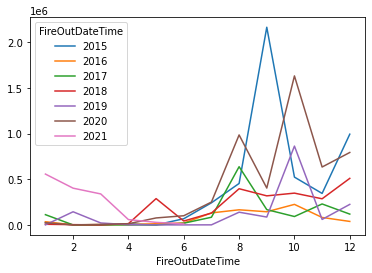

In [555]:
df.groupby([df.FireOutDateTime.dt.month, df.FireOutDateTime.dt.year])['CalculatedAcres'].sum().astype(int).unstack().plot()

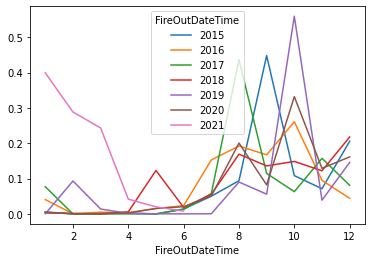

In [569]:
(df.groupby([df.FireOutDateTime.dt.month, df.FireOutDateTime.dt.year])['CalculatedAcres'].sum().astype(int).unstack() / \
df.groupby([df.FireOutDateTime.dt.month, df.FireOutDateTime.dt.year])['CalculatedAcres'].sum().astype(int).unstack().sum()).plot()
#.sum()

In [188]:
[x for x in df.columns if 'Date' in x]

['ContainmentDateTime',
 'ControlDateTime',
 'FinalFireReportApprovedDate',
 'FireDiscoveryDateTime',
 'FireOutDateTime',
 'ICS209ReportDateTime',
 'InitialResponseDateTime',
 'StrategicDecisionPublishDate',
 'CreatedOnDateTime_dt',
 'ModifiedOnDateTime_dt']

In [186]:
# convert date columns to datetime dtype
for c in [x for x in df.columns if 'Date' in x]:
    df[c] = pd.to_datetime(df[c])

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
df['FireOutDateTime'].dt.year.value_counts().sort_index()

2015    13147
2016    13671
2017    16300
2018    15274
2019    14932
2020    21050
2021     7668
Name: FireOutDateTime, dtype: int64

In [90]:
# df['FireOutDateTime'] = pd.to_datetime(df.FireOutDateTime)

In [123]:
# exclude fires that were extinguished 
# at a date later than the latest date in the dataset
df = df[df.FireOutDateTime < str(datetime.datetime.today())]

## Plot prior years against current year

### Cumulative sum of acres burned

In [422]:
# identify current year
current_year = datetime.datetime.today().year

# find current year date range
current_year_date_range = pd.date_range(pd.to_datetime('2021'), pd.to_datetime(pd.to_datetime('2021-12-31')))

In [423]:
df_agg = df.groupby([df.FireOutDateTime.dt.dayofyear, df.FireOutDateTime.dt.year])['CalculatedAcres'].sum() \
    .rename_axis(['Date','Year']).unstack().fillna(0).cumsum()

In [424]:
df_agg

Year,2015,2016,2017,2018,2019,2020,2021
Date,,,,,,,
1,0.000000e+00,0.0000,0.000000e+00,1.565286e+03,0.000000e+00,0.000000e+00,1.240763e+04
2,0.000000e+00,0.0000,0.000000e+00,1.565286e+03,0.000000e+00,1.841238e+04,1.247363e+04
3,0.000000e+00,0.0000,3.780193e+02,1.565286e+03,0.000000e+00,1.841238e+04,1.247373e+04
4,0.000000e+00,30450.1516,3.780193e+02,1.565286e+03,0.000000e+00,1.841238e+04,2.031613e+05
5,0.000000e+00,30450.1516,3.780193e+02,1.565286e+03,0.000000e+00,1.841238e+04,2.624370e+05
...,...,...,...,...,...,...,...
362,4.789407e+06,861377.1238,1.420261e+06,2.302660e+06,1.542557e+06,4.900575e+06,1.394780e+06
363,4.789560e+06,861377.1238,1.420261e+06,2.302660e+06,1.542557e+06,4.909474e+06,1.394780e+06
364,4.789560e+06,861377.1238,1.420261e+06,2.302660e+06,1.542557e+06,4.911701e+06,1.394780e+06


In [427]:
# adjust days to match current year
# by consolidating count from day 366 to day 365
df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

# drop day 366
df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)

In [428]:
df_agg

Year,2015,2016,2017,2018,2019,2020,2021
Date,,,,,,,
1,0.000000e+00,0.0000,0.000000e+00,1.565286e+03,0.000000e+00,0.000000e+00,1.240763e+04
2,0.000000e+00,0.0000,0.000000e+00,1.565286e+03,0.000000e+00,1.841238e+04,1.247363e+04
3,0.000000e+00,0.0000,3.780193e+02,1.565286e+03,0.000000e+00,1.841238e+04,1.247373e+04
4,0.000000e+00,30450.1516,3.780193e+02,1.565286e+03,0.000000e+00,1.841238e+04,2.031613e+05
5,0.000000e+00,30450.1516,3.780193e+02,1.565286e+03,0.000000e+00,1.841238e+04,2.624370e+05
...,...,...,...,...,...,...,...
361,4.789407e+06,861377.1238,1.420261e+06,2.302660e+06,1.542557e+06,4.900575e+06,1.394780e+06
362,4.789407e+06,861377.1238,1.420261e+06,2.302660e+06,1.542557e+06,4.900575e+06,1.394780e+06
363,4.789560e+06,861377.1238,1.420261e+06,2.302660e+06,1.542557e+06,4.909474e+06,1.394780e+06


In [429]:
# assign index to be the date range of the current year
df_agg.index = current_year_date_range

In [431]:
# for the current year
# for days beyond the latest date
# remove cumsum() value
df_agg.loc[df_agg.loc[str(df.FireOutDateTime.max().date()) < df_agg.index].index, current_year] = None

In [432]:
df_agg.tail().style.highlight_null(null_color='yellow')

Year,2015,2016,2017,2018,2019,2020,2021
2021-12-27 00:00:00,4789407.142300,861377.123800,1420261.085200,2302660.086800,1542557.239700,4900574.908800,nan
2021-12-28 00:00:00,4789407.142300,861377.123800,1420261.085200,2302660.086800,1542557.239700,4900574.908800,nan
2021-12-29 00:00:00,4789560.084500,861377.123800,1420261.085200,2302660.086800,1542557.239700,4909473.859200,nan
2021-12-30 00:00:00,4789560.084500,861377.123800,1420261.085200,2302660.086800,1542557.239700,4911700.992400,nan
2021-12-31 00:00:00,4828959.390800,861377.123800,1459676.465000,2342135.885300,1542557.239700,4913974.336900,nan


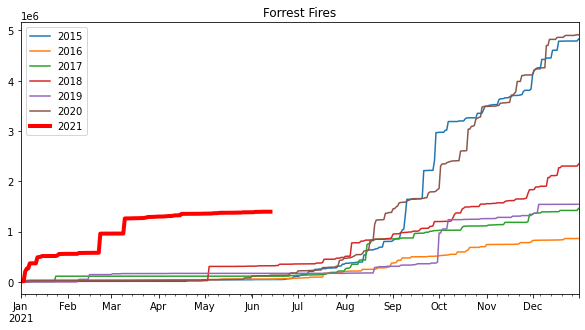

In [433]:
# fig, ax = plt.figure()
fig, ax = plt.subplots(figsize=(10, 5))

# plot prior years
df_agg.loc[:,df_agg.columns != current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns));

The jumps make sense because of especially large fires that consumed many acres.

### Forrest Fire Count (using function)

In [532]:
df_agg = df.groupby([df.FireOutDateTime.dt.dayofyear, df.FireOutDateTime.dt.year])['FireOutDateTime'].count() \
    .rename_axis(['Date','Year']).unstack().fillna(0).cumsum()

In [533]:
def multi_year_plot(df_agg):
    
    # identify current year
    current_year = datetime.datetime.today().year

    # find current year date range
    current_year_date_range = pd.date_range(pd.to_datetime(str(current_year)), pd.to_datetime(pd.to_datetime(f'{current_year}-12-31')))
    
    # if non leap year adjust days to match current year by consolidating count from day 366 to day 365
    if len(current_year_date_range) != len(df_agg.index):
        
        df_agg.loc[len(current_year_date_range)] = df_agg.loc[df_agg.index.max()]

        # drop day 366
        df_agg.drop(df_agg[len(current_year_date_range) < df_agg.index].index, inplace=True)
    
    # assign index to be the date range of the current year
    df_agg.index = current_year_date_range
    
    # for the current year for days beyond the latest date remove cumsum() value
    df_agg.loc[df_agg.loc[str(df.FireOutDateTime.max().date()) < df_agg.index].index, current_year] = None
    
    return df_agg

In [534]:
multi_year_plot(df_agg)

Year,2015,2016,2017,2018,2019,2020,2021
2021-01-01,15.0,6.0,30.0,13.0,3.0,4.0,22.0
2021-01-02,15.0,6.0,33.0,29.0,4.0,16.0,32.0
2021-01-03,16.0,7.0,44.0,45.0,5.0,25.0,43.0
2021-01-04,17.0,12.0,52.0,52.0,5.0,26.0,87.0
2021-01-05,21.0,14.0,55.0,65.0,7.0,34.0,104.0
...,...,...,...,...,...,...,...
2021-12-27,13104.0,13606.0,16249.0,15250.0,14833.0,20804.0,NaN
2021-12-28,13105.0,13609.0,16256.0,15252.0,14838.0,20815.0,NaN
2021-12-29,13107.0,13615.0,16267.0,15253.0,14840.0,20839.0,NaN
2021-12-30,13112.0,13620.0,16273.0,15256.0,14857.0,20862.0,NaN


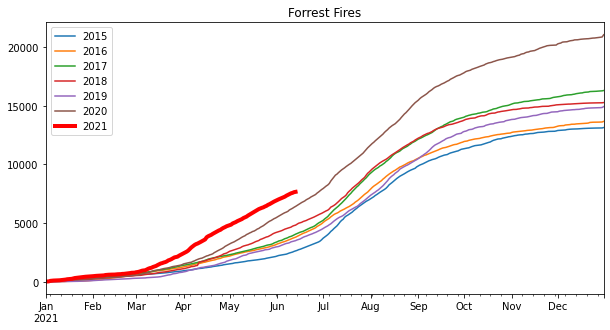

In [535]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot prior years
df_agg.loc[:,df_agg.columns != current_year].plot(title='Forrest Fires', ax=ax)

# highlight current year by 
# plotting in red with extra thickness
df_agg.loc[:,df_agg.columns == current_year].plot(linewidth=4, color='red', ax=ax)

plt.legend(list(df_agg.columns))

plt.show()